In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gradiente descendente

O gradiente descendente é um algoritmo de otimização feito para encontrar o minimo de uma função de custo. Ele serve basicamente para o ajuste de parâmetros de funções.

Ele começa com um conjunto inicial de parâmetros e em cada iteração, calcula o gradiente da função de custo em relação a esses parâmetros. O gradiente é uma medida da direção e magnitude do aumento mais rápido da função de custo em um ponto específico. O gradiente aponta na direção de maior aumento, portanto, o **gradiente negativo aponta na direção de maior diminuição**.
O algoritmo do gradiente descendente irá ajustar os parâmetros do modelo na direção oposta do gradiente (ou seja, em direção ao mínimo local), multiplicando o gradiente pelo passo de aprendizado, que é um hiperparâmetro que controla o tamanho do passo que o algoritmo dá em cada iteração. O processo é repetido até que a função de custo não possa mais ser reduzida ou até que um número máximo de iterações seja atingido.
Nessa atividade iremos melhor os parâmetros encontrados pelo modelo de regressão linear do sklearn e a função de custo definida é a do erro quadrático médio.
Devido a natureza da nossa função de custo, que é a de ser uma função de erro aditiva, isso nos permitirá utilizar a técnica do gradiente descendente estocástico, que calcula o gradiente (e dá um passo) para apenas um ponto por vez, evitando que seja necessário realizar demais operações e passando sobre os dados repetidamente até atingir um ponto de parada.

In [3]:
## importando csv
df = pd.read_csv('./Advertising.csv').drop("Unnamed: 0", axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
## Extraindo variavel resposta do modelo
X = df.iloc[:, 0].values
X_reshaped = X.reshape(-1, 1)
Y = df["sales"].values

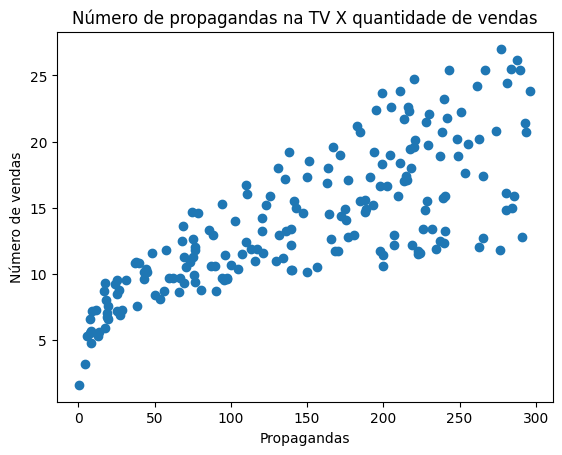

In [5]:
plt.scatter(X, Y)

plt.title("Número de propagandas na TV X quantidade de vendas")
plt.xlabel("Propagandas")
plt.ylabel("Número de vendas")
plt.show()

In [6]:
## Construindo modelo
model = LinearRegression()
## Treinando o modelo
model = model.fit(X_reshaped, Y)

predictions = model.predict(X_reshaped)

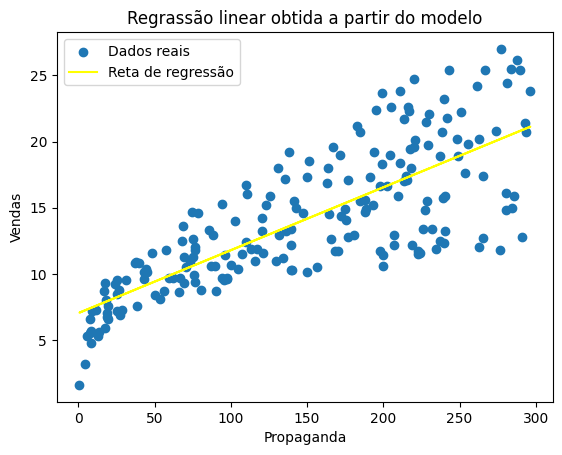

In [7]:
plt.title("Regrassão linear obtida a partir do modelo")
plt.scatter(X, Y, label="Dados reais")
plt.plot(X, predictions, color="yellow", label="Reta de regressão")
plt.legend()
plt.xlabel("Propaganda")
plt.ylabel("Vendas")
plt.show()

In [8]:
## Coeficientes do modelo (ax + b)
a = model.coef_[0]
b = model.intercept_
print(f"modelo = {a}x + {b}")

modelo = 0.04753664043301973x + 7.032593549127697


Definindo funções para calculo do gradiente

In [9]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.000001):
    data = list(zip(x, y))
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf")  # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        #print('value:', value)

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = np.subtract(theta, np.multiply(alpha, gradient_i))
            #theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta


def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)  # shuffle them
    for i in indexes:  # return the data in that order
        yield data[i]


def linear_f(x_i, theta):
    a, b = theta
    return a * x_i + b


def error(x_i, y_i, theta):
    return y_i - linear_f(x_i, theta)


def squared_error(x_i, y_i, theta):
    return error(x_i, y_i, theta) ** 2


def squared_error_gradient(x_i, y_i, theta):
    a, b = theta
    return [-2 * (y_i - a * x_i - b) * x_i,  #derivada parcial de a (theta_1)
            -2 * (y_i - a * x_i - b)]  #derivada parcial de b (theta_2)

In [10]:
theta_0 = [15, 15]
theta = minimize_stochastic(squared_error, squared_error_gradient, X, Y, theta_0, alpha_0=0.0000001)
print(theta)

[0.04422198 7.68632214]


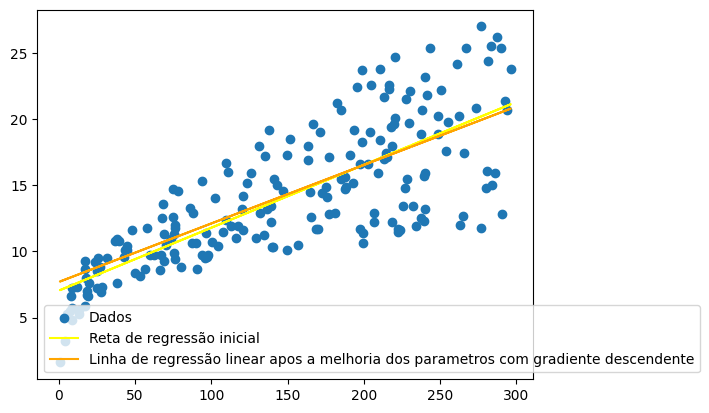

In [12]:
plt.scatter(X, Y, label="Dados")
Yhat = [linear_f(x_i, theta) for x_i in X]
plt.plot(X, predictions, color="yellow", label="Reta de regressão inicial")
plt.plot(X,Yhat, c="orange", label="Linha de regressão linear apos a melhoria dos parametros com gradiente descendente")
plt.legend()

plt.show()